<a href="https://colab.research.google.com/github/Ritikaverma2021/Distracted_Driver/blob/main/Data_Leakage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 15 kB/s 
     |████████████████████████████████| 5.9 MB 44.6 MB/s 
     |████████████████████████████████| 1.7 MB 34.6 MB/s 
     |████████████████████████████████| 438 kB 55.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
import os
import random
import numpy as np
import pandas as pd
from skimage import io
from skimage import color
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from dask.array.image import imread
from dask import bag, threaded
from dask.diagnostics import ProgressBar
import cv2
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.preprocessing import image
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import optimizers

In [ ]:
# Checking if the system is using GPU

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4341642059734494072
xla_global_id: -1
]


In [ ]:
# getting one image per label
f , ax = plt.subplots(1,10, figsize=(180,180))
for i in range(10):
    labels = imread("/content/drive/MyDrive/Project_Data_set/train/c"+str(i)+"/*.jpg")
    for j in range(1):
        img = labels[j]
        label = i
        ax[i].imshow(img)
        ax[i].set_title('C'+str(i))
        plt.show
     

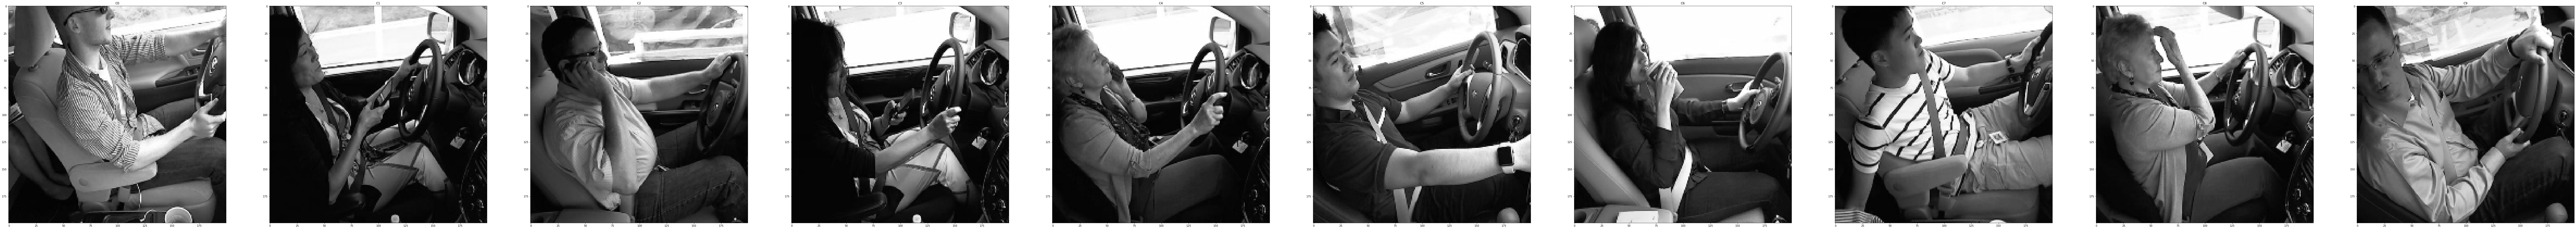

In [ ]:
# Changing to gray scale
f , ax = plt.subplots(1,10, figsize=(180,180))
for i in range(10):
    labels = imread("/content/drive/MyDrive/Project_Data_set/train/c"+str(i)+"/*.jpg")
    for j in range(1):
        img = labels[j]
        img = color.rgb2gray(img)       # converted to gray scale
        img = img[50:,120:-27]          # crop the image
        img = cv2.resize(img,(200,200))
        label = i
        ax[i].imshow(img, cmap='gray')
        ax[i].set_title('C'+str(i))
        plt.show

In [ ]:
train_image =[]
label_image =[]

for i in range(10):
    print('It is category c',i)     # confirmation for traversal through each folder
    labels = imread("/content/drive/MyDrive/Project_Data_set/train/c"+str(i)+"/*.jpg")
    for j in range(len(labels)):
        img = labels[j]
        img = color.rgb2gray(img)
        img = img[50:,120:-20]
        img = cv2.resize(img,(200,200))
        label =i
        train_image.append([img,label])
        label_image.append(i)


It is category c 0
It is category c 1
It is category c 2
It is category c 3
It is category c 4
It is category c 5
It is category c 6
It is category c 7
It is category c 8
It is category c 9


In [ ]:
# Randomly shuffling the images 
random.shuffle(train_image)

In [ ]:
# Splitting the image and label to two different lists

X_features = []
Y_labels = []
for features, labels in train_image:
    X_features.append(features)
    Y_labels.append(labels)
    
print(len(X_features),len(Y_labels))

22424 22424


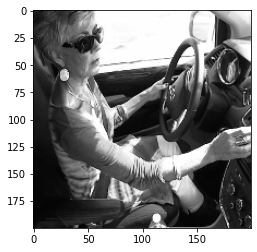

The image belongs to c5 category.


In [ ]:
# Exploring X_features and Y_labels 

plt.imshow(X_features[100],cmap='gray')
plt.show()
print("The image belongs to c{} category.".format(Y_labels[100]))

In [ ]:
# Converting images to nparray.
X_features = X_features[:1000]
X = np.array(X_features).reshape(-1,200,200,1)
print(X.shape)


(1000, 200, 200, 1)


In [ ]:
# Encoding Y
Y_labels = Y_labels[:1000]
Y = to_categorical(Y_labels)
print(Y.shape)

(1000, 10)


In [ ]:
# Designing the layers 
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size =0.2)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=(200,200,1),padding='same'))
model.add(BatchNormalization())
# padding : the amount of pixels added to an image when it is being processed by the kernel of a CNN.

model.add(MaxPooling2D(pool_size =(2,2)))

model.add(Conv2D(64,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(BatchNormalization())

model.add(Conv2D(64,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(100, activation = 'relu'))

model.add(Dense(10, activation='softmax')) 

sgd = optimizers.SGD(lr = 0.001)  # Gradient descent with learning rate 0.01
model.compile(loss='categorical_crossentropy',
              optimizer = sgd,
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))

Epoch 1/3
25/25 [==============================] - 18s 149ms/step - loss: 2.3845 - accuracy: 0.2175 - val_loss: 2.3285 - val_accuracy: 0.0800
Epoch 2/3
25/25 [==============================] - 2s 87ms/step - loss: 1.1804 - accuracy: 0.6400 - val_loss: 2.4164 - val_accuracy: 0.0800
Epoch 3/3
25/25 [==============================] - 2s 86ms/step - loss: 0.3835 - accuracy: 0.9287 - val_loss: 2.5717 - val_accuracy: 0.0800
